In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/trends-product-coffee-shop-sales-revenue-dataset/coffee-shop-sales-revenue.csv', sep = '|')

**Take a look at the file (column names and size of sheet). Check datatypes and basic metrics (df.describe) to get better understanding of the sheet.**

In [3]:
df.shape

(149116, 11)

In [4]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


**We will take a look at the busiest hours in each location and try to understand trends within these hours.**

In [6]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

**For this time we will keep all of the columns.**

In [7]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

**No empty rows visible.**

In [8]:
df.loc[df.duplicated()]

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail


**No duplicate rows visible.**

In [9]:
df['transaction_date'].value_counts().sort_index()

transaction_date
2023-01-01     550
2023-01-02     566
2023-01-03     582
2023-01-04     497
2023-01-05     547
              ... 
2023-06-26    1195
2023-06-27    1277
2023-06-28    1070
2023-06-29    1009
2023-06-30    1095
Name: count, Length: 181, dtype: int64

**Timeline of the sheet is from 1.1.2023 until 30.6.2023.**

**We will be interested to view transactions per hour, so we can slice the transaction_time column.**

In [10]:
df['transaction_time'] = df['transaction_time'].str[:2]

In [11]:
df['transaction_time'].value_counts()

transaction_time
10    18545
09    17764
08    17654
07    13428
11     9766
16     9093
15     8979
14     8933
17     8745
13     8714
12     8708
18     7498
19     6092
06     4594
20      603
Name: count, dtype: int64

**We can see that the first transactions happen at the 6th hour, and the last transactions take place at the 20th hour of the day. Although we can't know for sure yet, but we can assume these are the opening hours for the locations. We will be checking each location individualy also later on.**

In [12]:
df['store_location'].value_counts()

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64

**The sheet contains three different store locations, which have roughly the same amount of transactions.**

**Use the query method to slice by the locations.**

In [13]:
df.query("store_location == 'Astoria'").count()

transaction_id      50599
transaction_date    50599
transaction_time    50599
transaction_qty     50599
store_id            50599
store_location      50599
product_id          50599
unit_price          50599
product_category    50599
product_type        50599
product_detail      50599
dtype: int64

**Lets create "handle" for the transactions in all locations.**

In [14]:
astoria_transactions = df.query("store_location == 'Astoria'")

In [15]:
astoria_transactions.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
105,106,2023-01-01,11,1,3,Astoria,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
106,107,2023-01-01,11,1,3,Astoria,38,3.75,Coffee,Barista Espresso,Latte
107,108,2023-01-01,11,1,3,Astoria,75,3.50,Bakery,Pastry,Croissant
111,112,2023-01-01,11,1,3,Astoria,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
113,114,2023-01-01,11,1,3,Astoria,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg


In [16]:
df.query("store_location == 'Lower Manhattan'").count()

transaction_id      47782
transaction_date    47782
transaction_time    47782
transaction_qty     47782
store_id            47782
store_location      47782
product_id          47782
unit_price          47782
product_category    47782
product_type        47782
product_detail      47782
dtype: int64

In [17]:
manhattan_transactions = df.query("store_location == 'Lower Manhattan'")

In [18]:
manhattan_transactions.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [19]:
# df.query("store_location == 'Hell's Kitchen").count()
# the "'" in "Hell's" is causing problems for the interpreter

**We will use the store_id for location Hell's Kitchen. We will search it in the list of value_counts (df['store_id'].value_counts), and find the matching amount of transactions as Hell's Kitchen.**

In [20]:
df['store_id'].value_counts()

store_id
8    50735
3    50599
5    47782
Name: count, dtype: int64

**By running "df['store_location'].value_counts()" Hell's Kitchen had 50735 transactions. By running "df['store_id'].value_counts()" store with the store ID of "8" had the same amount of transactions as Hell's Kitchen, so the store_id of Hell's Kitchen is 8.**

In [21]:
df.query("store_id == 8").count()

transaction_id      50735
transaction_date    50735
transaction_time    50735
transaction_qty     50735
store_id            50735
store_location      50735
product_id          50735
unit_price          50735
product_category    50735
product_type        50735
product_detail      50735
dtype: int64

In [22]:
hells_kitchen_transactions = df.query("store_id == 8")

In [23]:
hells_kitchen_transactions.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
17,18,2023-01-01,08,1,8,Hell's Kitchen,42,2.50,Tea,Brewed herbal tea,Lemon Grass Rg
18,19,2023-01-01,08,2,8,Hell's Kitchen,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
19,20,2023-01-01,08,1,8,Hell's Kitchen,61,4.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Lg
20,21,2023-01-01,08,2,8,Hell's Kitchen,33,3.50,Coffee,Gourmet brewed coffee,Ethiopia Lg
23,24,2023-01-01,08,1,8,Hell's Kitchen,56,2.55,Tea,Brewed Chai tea,Spicy Eye Opener Chai Rg


**Since we are trying to understand trends at this exploratory analysis we will be interested in the product category, and maybe product type. For now we will not be taking into account the day of the week, although it would be a step towards more advanced analysis.
We can now drop columns: transaction_id, transaction_date, product_id, product_detail**

In [24]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

In [25]:
#Dropping columns commenting them out (easier to keep track of dropped/selected columns)

df = df[[#'transaction_id', 'transaction_date', 
    'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 
    #'product_id',
       'unit_price', 'product_category', 'product_type', 
    #'product_detail'
]].copy()

In [26]:
df.head()

,transaction_time,transaction_qty,store_id,store_location,unit_price,product_category,product_type
0,07,2,5,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee
1,07,2,5,Lower Manhattan,3.1,Tea,Brewed Chai tea
2,07,2,5,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate
3,07,1,5,Lower Manhattan,2.0,Coffee,Drip coffee
4,07,2,5,Lower Manhattan,3.1,Tea,Brewed Chai tea


**Look at the busiest hours individualy by each location.**

In [27]:
astoria_transactions['transaction_time'].value_counts()

transaction_time
10    5291
09    5083
08    4966
07    4181
16    3599
19    3565
18    3463
13    3456
12    3438
15    3423
11    3413
17    3402
14    3319
Name: count, dtype: int64

**Astoria store has transactions from 07 until 19, so we may assume the opening hours differ within locations.**

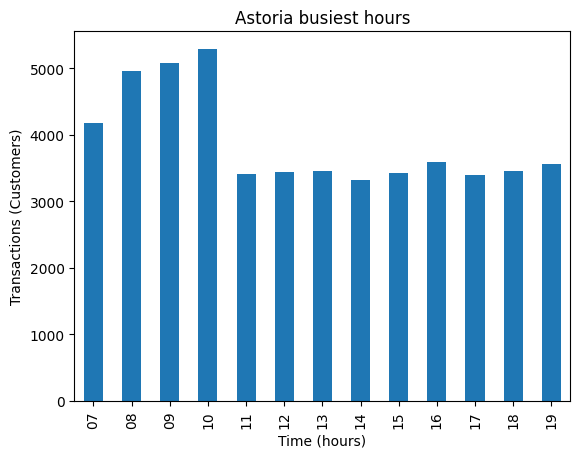

In [28]:
ax = astoria_transactions['transaction_time'].value_counts().sort_index().plot(kind='bar', title='Astoria busiest hours')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Transactions (Customers)')
plt.show()

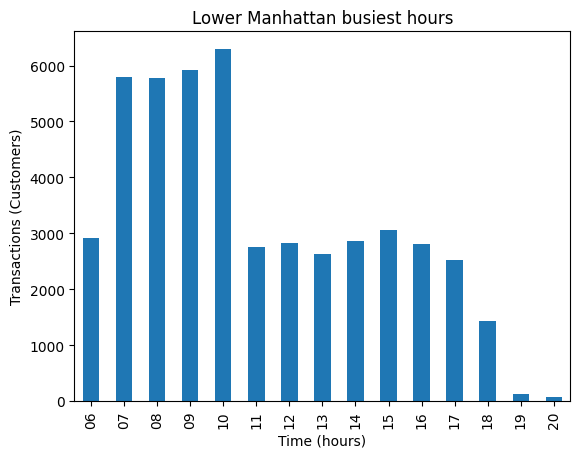

In [29]:
ax = manhattan_transactions['transaction_time'].value_counts().sort_index().plot(kind='bar', title='Lower Manhattan busiest hours')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Transactions (Customers)')
plt.show()

**Lower Manhattan location opening hours are from 06 until 20. The last two hours barely have customers. The opening hours should be adjusted, unless the shop is open to prepare for the next day behalf of all locations, or other business is handled (wholesale, deliveries, etc.).**

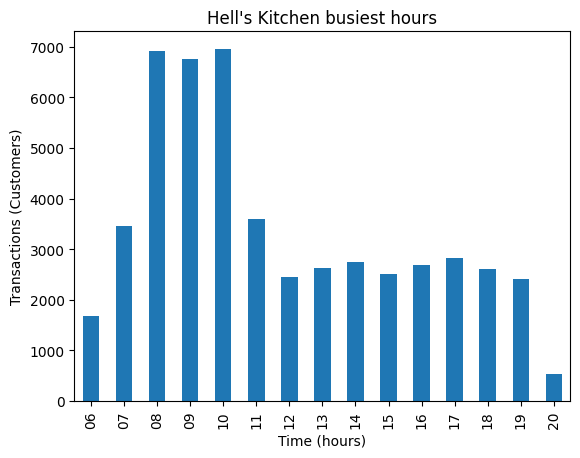

In [30]:
ax = hells_kitchen_transactions['transaction_time'].value_counts().sort_index().plot(kind='bar', title="Hell's Kitchen busiest hours")
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Transactions (Customers)')
plt.show()

**All of the locations have the same busiest hours 08, 09, 10. None of the locations are the same. Astoria has shorter opening hours and a more stable customer distribution compared to Hell's Kitchen and Lower Manhattan. Lower Manhattan had a good amount of customers on the first hour, but the last two hours are close to non-existing. Hell's Kitchen has a slow first and last hour, which shows the best hours for customers(07-19).**

**However there might be other actions taking place during slow hours to enhance synergy between the locations. Since Astoria location has shorter opening hours and I assume the locations are in the New York City area (Hell's Kitchen and Lower Manhattan) it could be a smaller locations with smaller amount of staff. A smaller location could also indicate a smaller kitchen, which makes the production of products less convenient. This could also explain the two consequential slow hours in Lower Manhattan, if they produce the products sold in Astoria location.**

**Lets better understand the categories and products.**

In [31]:
df['product_category'].value_counts()

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

In [32]:
df['product_type'].value_counts().count()

29

**9 product categories, and 29 product types.**

In [33]:
df['transaction_qty'].sum()

214470

In [34]:
astoria_transactions['transaction_qty'].sum()

70991

In [35]:
manhattan_transactions['transaction_qty'].sum()

71742

In [36]:
hells_kitchen_transactions['transaction_qty'].sum()

71737

**Total of 214470 sold units.**

**Astoria: 70991**

**Lower Manhattan: 71742**

**Hell's Kitchen: 71737**

In [37]:
df['Sales (USD)'] = df['transaction_qty'] * df['unit_price']

In [38]:
df['Sales (USD)'].sum().round(2)

698812.33

In [39]:
df[df['store_location'] == 'Astoria']['Sales (USD)'].sum().round(2)

232243.91

In [40]:
df[df['store_location'] == 'Lower Manhattan']['Sales (USD)'].sum()

230057.25

In [41]:
df[df['store_location'] == "Hell's Kitchen"]['Sales (USD)'].sum().round(2)

236511.17

**Total sales in USD: 698 812.33**

**Astoria: 232 243.91**

**Lower Manhattan: 230 057.25**

**Hell's Kitchen: 236 511.17**

In [42]:
df[df['product_category'] == 'Coffee']['transaction_qty'].sum()

89250

In [43]:
category_sales = df.groupby('product_category')['Sales (USD)'].sum()
category_sales.round()

product_category
Bakery                 82316.0
Branded                13607.0
Coffee                269952.0
Coffee beans           40085.0
Drinking Chocolate     72416.0
Flavours                8409.0
Loose Tea              11214.0
Packaged Chocolate      4408.0
Tea                   196406.0
Name: Sales (USD), dtype: float64

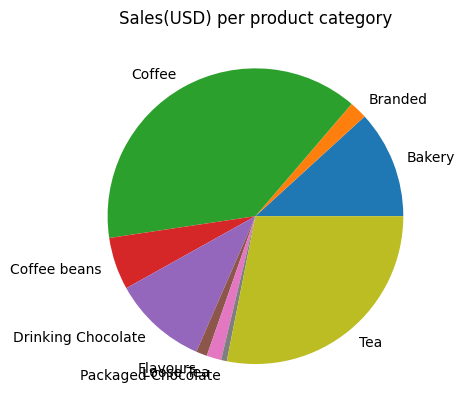

In [44]:
plt.pie(category_sales, labels=category_sales.index)
plt.title('Sales(USD) per product category')
plt.show()

**Majority of sales come from categories Coffee and Tea. Bakery products and drinking chocolate are also noticable product categories.**

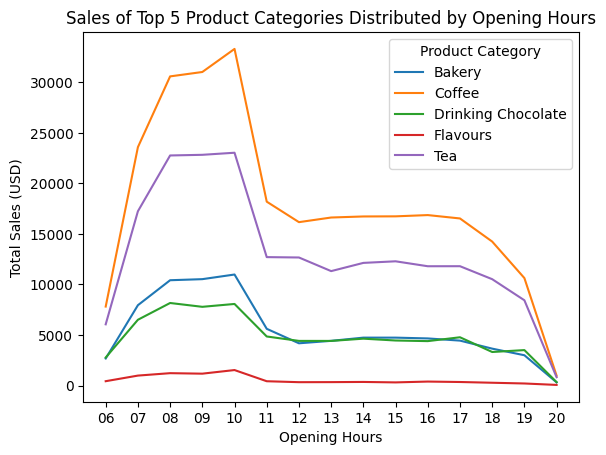

In [45]:
top_categories = df['product_category'].value_counts().nlargest(5).index
df_top_categories = df[df['product_category'].isin(top_categories)]
df_category_sales = df_top_categories.groupby(['transaction_time', 'product_category'])['Sales (USD)'].sum().reset_index()

sns.lineplot(x='transaction_time', y='Sales (USD)', hue='product_category', data=df_category_sales)

plt.title('Sales of Top 5 Product Categories Distributed by Opening Hours')
plt.xlabel('Opening Hours')
plt.ylabel('Total Sales (USD)')
plt.legend(title='Product Category')
plt.show()

**All of the biggest product categories experience a sales spike at 10 o'clock and then gradually decrease. Sales remain steady between 12 and 17.**

In [46]:
df_astoria_transactions = astoria_transactions
df_astoria_transactions['Sales (USD)'] = df_astoria_transactions['transaction_qty'] * df_astoria_transactions['unit_price']

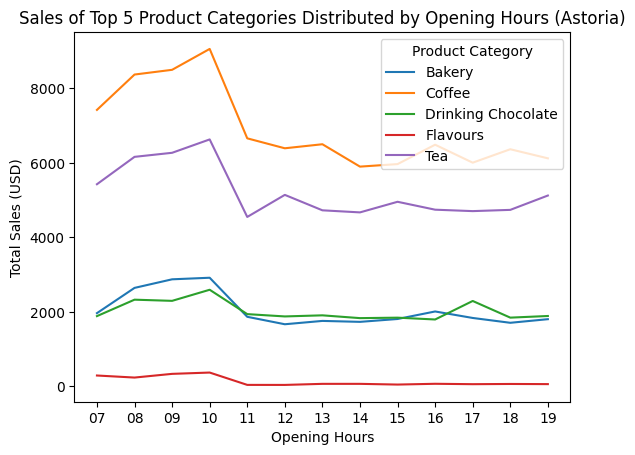

In [47]:
top_categories_astoria = df_astoria_transactions['product_category'].value_counts().nlargest(5).index
df_top_categories_astoria = df_astoria_transactions[df_astoria_transactions['product_category'].isin(top_categories_astoria)]
df_category_sales_astoria = df_top_categories_astoria.groupby(['transaction_time', 'product_category'])['Sales (USD)'].sum().reset_index()

sns.lineplot(x='transaction_time', y='Sales (USD)', hue='product_category', data=df_category_sales_astoria)

plt.title('Sales of Top 5 Product Categories Distributed by Opening Hours (Astoria)')
plt.xlabel('Opening Hours')
plt.ylabel('Total Sales (USD)')
plt.legend(title='Product Category')
plt.show()

**Trends of the 5 biggest product categories in Astoria location are subtle. The peak times are noticable, but the ascending and descending of sales are not as significant. Drinking chocolate is the most stable product category throughout the day, if small product categories are not considered.**

**The location is busy from the first hour to the last hour. By expanding opening hours at this location we could learn about potentially profitable hours, or viceversa. Drinking chocolate and Tea are trending positively in the last hour, so I think expanding hours would primarily focus to hour 20.**

In [48]:
df_manhattan_transactions = manhattan_transactions
df_manhattan_transactions['Sales (USD)'] = df_manhattan_transactions['transaction_qty'] * df_manhattan_transactions['unit_price']

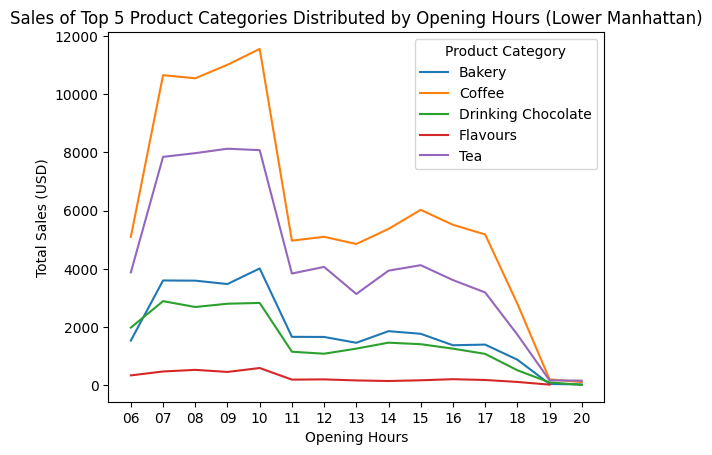

In [49]:
top_categories_manhattan = df_manhattan_transactions['product_category'].value_counts().nlargest(5).index
df_top_categories_manhattan = df_manhattan_transactions[df_manhattan_transactions['product_category'].isin(top_categories_manhattan)]
df_category_sales_manhattan = df_top_categories_manhattan.groupby(['transaction_time', 'product_category'])['Sales (USD)'].sum().reset_index()

sns.lineplot(x='transaction_time', y='Sales (USD)', hue='product_category', data=df_category_sales_manhattan)

plt.title('Sales of Top 5 Product Categories Distributed by Opening Hours (Lower Manhattan)')
plt.xlabel('Opening Hours')
plt.ylabel('Total Sales (USD)')
plt.legend(title='Product Category')
plt.show()

**The trends within the 5 most significant product categories at the Lower Manhattan location have more noticeable patterns. The hours until 10 are busy, but are followed by a significant descent until 11. The next couple of hours are quieter, but the location shows an ascending trend in sales from hours 13 until 15. The last three hours are quiet, with the last two hours close to non-existent.**

**The location might attract a different group of customers before and after working hours. Depending on the location, it could succeed with additional products, such as lunch meals or similar.**

**The last two hours should be inspected more closely. If the location is used as a distribution or production facility, this would explain why it is kept open.**

In [50]:
df_hells_kitchen_transactions = hells_kitchen_transactions
df_hells_kitchen_transactions['Sales (USD)'] = df_hells_kitchen_transactions['transaction_qty'] * df_hells_kitchen_transactions['unit_price']

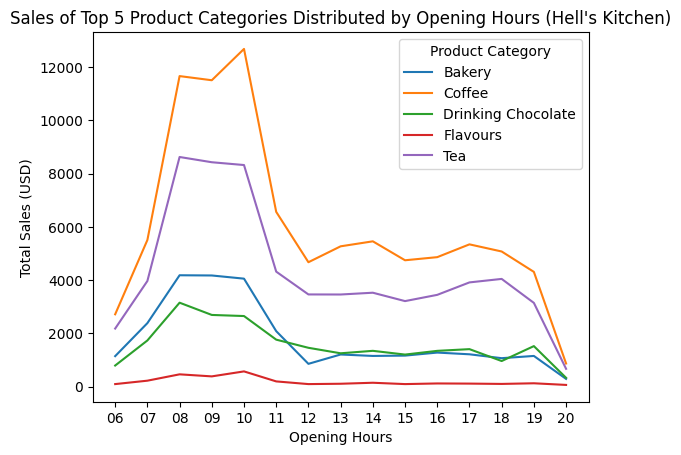

In [51]:
top_categories_hells_kitchen = df_hells_kitchen_transactions['product_category'].value_counts().nlargest(5).index
df_top_categories_hells_kitchen = df_hells_kitchen_transactions[df_hells_kitchen_transactions['product_category'].isin(top_categories_hells_kitchen)]
df_category_sales_hells_kitchen = df_top_categories_hells_kitchen.groupby(['transaction_time', 'product_category'])['Sales (USD)'].sum().reset_index()

sns.lineplot(x='transaction_time', y='Sales (USD)', hue='product_category', data=df_category_sales_hells_kitchen)

plt.title("Sales of Top 5 Product Categories Distributed by Opening Hours (Hell's Kitchen)")
plt.xlabel('Opening Hours')
plt.ylabel('Total Sales (USD)')
plt.legend(title='Product Category')
plt.show()

**The location in Hell's Kitchen has a more intense peak time. Time between 06 and 07 are trending positively, but is not as intense as Lower Manhattan. After the peak hours the sales are stable until 19. The last hour is descending rapidly, and the closing time could be adjusted to 19.**

In [52]:
df['Sales (USD)'] = pd.to_numeric(df['Sales (USD)'], errors='coerce')
df['average_purchase_per_hour'] = df.groupby('transaction_time')['Sales (USD)'].transform('mean').round(2)


In [53]:
df['average_purchase_per_hour'].value_counts()

average_purchase_per_hour
4.78    18545
4.79    17764
4.68    17654
4.62    17641
4.73    13428
4.74     9766
4.52     9093
4.65     8979
4.59     8745
4.63     8714
4.57     7498
4.67     6092
4.77     4594
4.87      603
Name: count, dtype: int64

**Average purchase per hour is very stable.**

**Lets check for correlations, and draw a heatmap.**

In [54]:
df_corr = df[['transaction_time','transaction_qty','store_id','unit_price','Sales (USD)','average_purchase_per_hour']].dropna().corr()
df_corr

,transaction_time,transaction_qty,store_id,unit_price,Sales (USD),average_purchase_per_hour
transaction_time,1.000000,-0.006310,-0.075813,-0.018435,-0.013783,-0.698877
transaction_qty,-0.006310,1.000000,-0.000794,-0.123546,0.356231,0.003688
store_id,-0.075813,-0.000794,1.000000,0.001891,0.004595,0.094701
unit_price,-0.018435,-0.123546,0.001891,1.000000,0.685550,0.024569
Sales (USD),-0.013783,0.356231,0.004595,0.685550,1.000000,0.019611
average_purchase_per_hour,-0.698877,0.003688,0.094701,0.024569,0.019611,1.000000


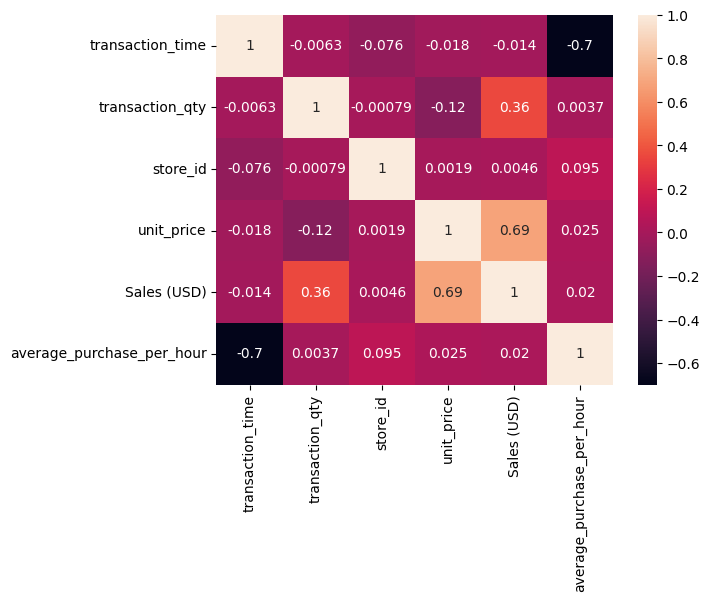

In [55]:
sns.heatmap(df_corr, annot=True)
plt.show()

**No significant correlations were found that would help understand the situation of the locations. Sales correlate with unit price, which is logical. In addition, sales correlate slightly with transaction quantity, which is also logical.**

**Drop final columns to make the sheet more presentable.**

In [56]:
df.drop(['store_id'], axis=1, inplace=True)

In [57]:
df

,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,Sales (USD),average_purchase_per_hour
0,07,2,Lower Manhattan,3.00,Coffee,Gourmet brewed coffee,6.00,4.73
1,07,2,Lower Manhattan,3.10,Tea,Brewed Chai tea,6.20,4.73
2,07,2,Lower Manhattan,4.50,Drinking Chocolate,Hot chocolate,9.00,4.73
3,07,1,Lower Manhattan,2.00,Coffee,Drip coffee,2.00,4.73
4,07,2,Lower Manhattan,3.10,Tea,Brewed Chai tea,6.20,4.73
...,...,...,...,...,...,...,...,...
149111,20,2,Hell's Kitchen,2.50,Tea,Brewed herbal tea,5.00,4.87
149112,20,2,Hell's Kitchen,3.00,Tea,Brewed Black tea,6.00,4.87
149113,20,1,Hell's Kitchen,3.00,Tea,Brewed herbal tea,3.00,4.87
149114,20,1,Hell's Kitchen,3.75,Coffee,Barista Espresso,3.75,4.87


**Lets change the names of the columns, so they are easy to read.**

In [58]:
df.columns

Index(['transaction_time', 'transaction_qty', 'store_location', 'unit_price',
       'product_category', 'product_type', 'Sales (USD)',
       'average_purchase_per_hour'],
      dtype='object')

In [59]:
df = df.rename(columns={'transaction_time':'Transaction Hour',
                   'transaction_qty':'Amount of Products',
                   'store_location':'Store Location',
                   'unit_price':'Unit Price',
                   'product_category':'Product Category',
                   'product_type':'Product Type',
                   'average_purchase_per_hour':'Average Purchase per Hour (USD)'})

In [60]:
df

,Transaction Hour,Amount of Products,Store Location,Unit Price,Product Category,Product Type,Sales (USD),Average Purchase per Hour (USD)
0,07,2,Lower Manhattan,3.00,Coffee,Gourmet brewed coffee,6.00,4.73
1,07,2,Lower Manhattan,3.10,Tea,Brewed Chai tea,6.20,4.73
2,07,2,Lower Manhattan,4.50,Drinking Chocolate,Hot chocolate,9.00,4.73
3,07,1,Lower Manhattan,2.00,Coffee,Drip coffee,2.00,4.73
4,07,2,Lower Manhattan,3.10,Tea,Brewed Chai tea,6.20,4.73
...,...,...,...,...,...,...,...,...
149111,20,2,Hell's Kitchen,2.50,Tea,Brewed herbal tea,5.00,4.87
149112,20,2,Hell's Kitchen,3.00,Tea,Brewed Black tea,6.00,4.87
149113,20,1,Hell's Kitchen,3.00,Tea,Brewed herbal tea,3.00,4.87
149114,20,1,Hell's Kitchen,3.75,Coffee,Barista Espresso,3.75,4.87
